In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
trainmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\train.csv")
testmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\test.csv")

In [39]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
def uniquevalues(df):
    for col in df.columns:
        if df[col].dtype=='O':
            print("The unique values of {0} is {1}".format(col,df[col].nunique()))
            
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category,drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns    

def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

def dateformatchange(date):
    Month=date.split('-')[0]
    Year="20"+ date.split('-')[1]
    monthnum=d.get(Month)
    newdate= "0" + str(monthnum) + "/" + Year
    return newdate

def checkmvalue(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=0
    for i in allm:
        if df[i]>0:
            j=1
    return j  
def checknummissed(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=0
    for i in allm:
        if df[i]>0:
            j=j+1
    return j 

def checkmaxmissed(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=df[allm].max()
    return j

In [40]:
df=trainmain.copy()
df_test=testmain.copy()
df.drop('loan_id',axis=1,inplace=True)
df_test.drop('loan_id',axis=1,inplace=True)
df_test['origination_date'] =pd.to_datetime(df_test['origination_date']).dt.strftime('%Y-%d-%m')
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12 }
df_test['first_payment_date']=df_test['first_payment_date'].apply(dateformatchange)

In [41]:
df=df[df['interest_rate']<6]
df=df[df['unpaid_principal_bal']<700000]
df=df[df['loan_to_value']>10]

In [42]:
import datetime

now = datetime.datetime.now()
today=now.strftime("%Y-%m-%d")
df['loan_age_months'] =  (pd.to_datetime(today)-pd.to_datetime(df.origination_date))/np.timedelta64(1,'M')
df['loan_age_months'] = df['loan_age_months'].astype(int)
df['remaining_months']=df['loan_term']-df['loan_age_months']

In [43]:
df_test['loan_age_months'] =  (pd.to_datetime(today)-pd.to_datetime(df_test.origination_date))/np.timedelta64(1,'M')
df_test['loan_age_months'] = df_test['loan_age_months'].astype(int)
df_test['remaining_months']=df_test['loan_term']-df_test['loan_age_months']

In [44]:
df['mothly_amount']=(df['unpaid_principal_bal']/df['remaining_months'])
df_test['mothly_amount']=(df_test['unpaid_principal_bal']/df_test['remaining_months'])

In [45]:
df['flagm']= df.apply(lambda row: checkmvalue(row), axis = 1)
df_test['flagm']= df_test.apply(lambda row: checkmvalue(row), axis = 1) 
df['flagmmissedno']= df.apply(lambda row: checknummissed(row), axis = 1)
df_test['flagmmissedno']= df_test.apply(lambda row: checknummissed(row), axis = 1)
df['flagmmaxmissed']= df.apply(lambda row: checkmaxmissed(row), axis = 1)
df_test['flagmmaxmissed']= df_test.apply(lambda row: checkmaxmissed(row), axis = 1)

In [46]:
X=df.drop(['m13'],axis=1)
y=df['m13']


In [47]:
#X, cat_cols = one_hot_encoder(X, False)
#df, cat_cols = one_hot_encoder(df, False)
#df_test, cat_cols = one_hot_encoder(df_test, False)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115966 entries, 0 to 116057
Data columns (total 33 columns):
source                      115966 non-null object
financial_institution       115966 non-null object
interest_rate               115966 non-null float64
unpaid_principal_bal        115966 non-null int64
loan_term                   115966 non-null int64
origination_date            115966 non-null object
first_payment_date          115966 non-null object
loan_to_value               115966 non-null int64
number_of_borrowers         115966 non-null float64
debt_to_income_ratio        115966 non-null float64
borrower_credit_score       115966 non-null float64
loan_purpose                115966 non-null object
insurance_percent           115966 non-null float64
co-borrower_credit_score    115966 non-null float64
insurance_type              115966 non-null float64
m1                          115966 non-null int64
m2                          115966 non-null int64
m3                  

In [49]:
import catboost as cb
cat_ind1 = [0,1,5,6,11]
cat_rg1 = cb.CatBoostClassifier(iterations=625, learning_rate=0.06, depth=8, loss_function='Logloss', random_seed=2018)

In [50]:
cat_rg1.fit(X=X, y=y, cat_features=cat_ind1, verbose=True)

0:	learn: 0.5296805	total: 321ms	remaining: 3m 20s
1:	learn: 0.4164152	total: 488ms	remaining: 2m 32s
2:	learn: 0.3178093	total: 681ms	remaining: 2m 21s
3:	learn: 0.2463256	total: 839ms	remaining: 2m 10s
4:	learn: 0.1960695	total: 965ms	remaining: 1m 59s
5:	learn: 0.1562739	total: 1.12s	remaining: 1m 55s
6:	learn: 0.1253652	total: 1.28s	remaining: 1m 52s
7:	learn: 0.1026329	total: 1.43s	remaining: 1m 50s
8:	learn: 0.0845649	total: 1.59s	remaining: 1m 48s
9:	learn: 0.0709772	total: 1.75s	remaining: 1m 47s
10:	learn: 0.0603460	total: 1.92s	remaining: 1m 47s
11:	learn: 0.0527429	total: 2.02s	remaining: 1m 43s
12:	learn: 0.0462964	total: 2.17s	remaining: 1m 42s
13:	learn: 0.0408255	total: 2.33s	remaining: 1m 41s
14:	learn: 0.0366191	total: 2.49s	remaining: 1m 41s
15:	learn: 0.0333690	total: 2.64s	remaining: 1m 40s
16:	learn: 0.0306302	total: 2.81s	remaining: 1m 40s
17:	learn: 0.0286128	total: 2.97s	remaining: 1m 40s
18:	learn: 0.0270873	total: 3.13s	remaining: 1m 39s
19:	learn: 0.0255867	t

158:	learn: 0.0150509	total: 30s	remaining: 1m 28s
159:	learn: 0.0150437	total: 30.2s	remaining: 1m 27s
160:	learn: 0.0150337	total: 30.4s	remaining: 1m 27s
161:	learn: 0.0150220	total: 30.6s	remaining: 1m 27s
162:	learn: 0.0150017	total: 30.8s	remaining: 1m 27s
163:	learn: 0.0149819	total: 31s	remaining: 1m 27s
164:	learn: 0.0149805	total: 31.1s	remaining: 1m 26s
165:	learn: 0.0149779	total: 31.2s	remaining: 1m 26s
166:	learn: 0.0149771	total: 31.4s	remaining: 1m 26s
167:	learn: 0.0149646	total: 31.6s	remaining: 1m 25s
168:	learn: 0.0149522	total: 31.8s	remaining: 1m 25s
169:	learn: 0.0149211	total: 31.9s	remaining: 1m 25s
170:	learn: 0.0149203	total: 32.1s	remaining: 1m 25s
171:	learn: 0.0149196	total: 32.2s	remaining: 1m 24s
172:	learn: 0.0149042	total: 32.4s	remaining: 1m 24s
173:	learn: 0.0148580	total: 32.5s	remaining: 1m 24s
174:	learn: 0.0148519	total: 32.7s	remaining: 1m 24s
175:	learn: 0.0148255	total: 32.9s	remaining: 1m 23s
176:	learn: 0.0148250	total: 33s	remaining: 1m 23s

315:	learn: 0.0131430	total: 59.9s	remaining: 58.6s
316:	learn: 0.0131363	total: 1m	remaining: 58.4s
317:	learn: 0.0131240	total: 1m	remaining: 58.3s
318:	learn: 0.0131114	total: 1m	remaining: 58.2s
319:	learn: 0.0131073	total: 1m	remaining: 58.1s
320:	learn: 0.0130975	total: 1m 1s	remaining: 58s
321:	learn: 0.0130783	total: 1m 1s	remaining: 57.9s
322:	learn: 0.0130700	total: 1m 1s	remaining: 57.8s
323:	learn: 0.0130489	total: 1m 1s	remaining: 57.6s
324:	learn: 0.0130372	total: 1m 2s	remaining: 57.4s
325:	learn: 0.0130224	total: 1m 2s	remaining: 57.3s
326:	learn: 0.0130053	total: 1m 2s	remaining: 57.1s
327:	learn: 0.0129959	total: 1m 2s	remaining: 56.9s
328:	learn: 0.0129855	total: 1m 3s	remaining: 56.7s
329:	learn: 0.0129799	total: 1m 3s	remaining: 56.5s
330:	learn: 0.0129645	total: 1m 3s	remaining: 56.3s
331:	learn: 0.0129567	total: 1m 3s	remaining: 56.1s
332:	learn: 0.0129290	total: 1m 3s	remaining: 56s
333:	learn: 0.0129256	total: 1m 4s	remaining: 55.8s
334:	learn: 0.0129160	total:

473:	learn: 0.0116219	total: 1m 31s	remaining: 29.1s
474:	learn: 0.0116134	total: 1m 31s	remaining: 28.9s
475:	learn: 0.0116063	total: 1m 31s	remaining: 28.7s
476:	learn: 0.0115959	total: 1m 31s	remaining: 28.5s
477:	learn: 0.0115824	total: 1m 32s	remaining: 28.3s
478:	learn: 0.0115683	total: 1m 32s	remaining: 28.1s
479:	learn: 0.0115558	total: 1m 32s	remaining: 27.9s
480:	learn: 0.0115507	total: 1m 32s	remaining: 27.7s
481:	learn: 0.0115473	total: 1m 32s	remaining: 27.5s
482:	learn: 0.0115369	total: 1m 33s	remaining: 27.3s
483:	learn: 0.0115305	total: 1m 33s	remaining: 27.1s
484:	learn: 0.0115211	total: 1m 33s	remaining: 27s
485:	learn: 0.0115083	total: 1m 33s	remaining: 26.8s
486:	learn: 0.0115015	total: 1m 33s	remaining: 26.6s
487:	learn: 0.0114891	total: 1m 33s	remaining: 26.4s
488:	learn: 0.0114861	total: 1m 34s	remaining: 26.2s
489:	learn: 0.0114758	total: 1m 34s	remaining: 26s
490:	learn: 0.0114700	total: 1m 34s	remaining: 25.8s
491:	learn: 0.0114590	total: 1m 34s	remaining: 25.

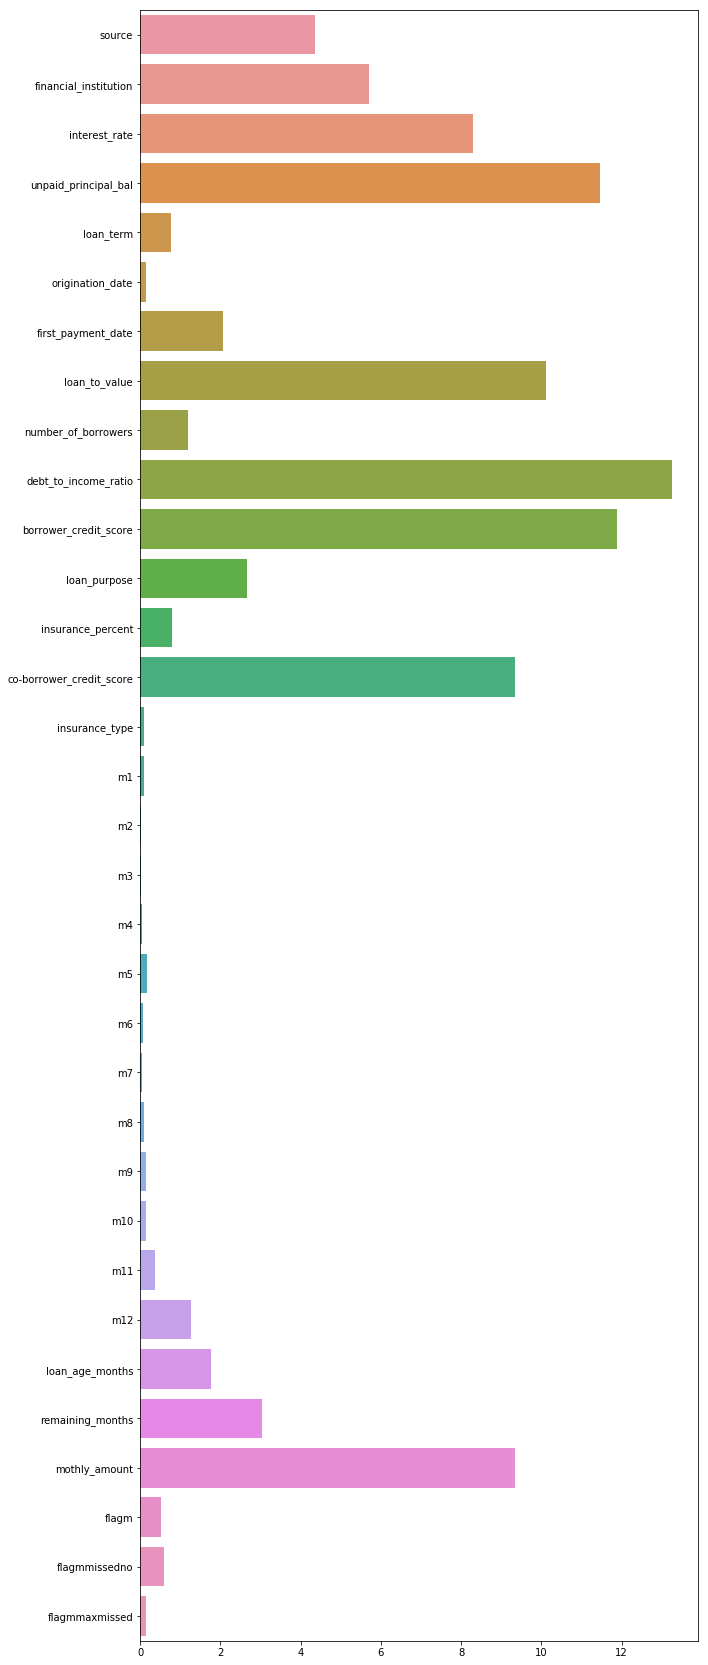

In [51]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg1.feature_importances_, X.columns, ax=ax)
plt.show()

In [52]:
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':cat_rg1.feature_importances_})
fea_imp_ =fea_imp_.sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [54]:
fea_imp_[0:18].cols

0         debt_to_income_ratio
1        borrower_credit_score
2         unpaid_principal_bal
3                loan_to_value
4                mothly_amount
5     co-borrower_credit_score
6                interest_rate
7        financial_institution
8                       source
9             remaining_months
10                loan_purpose
11          first_payment_date
12             loan_age_months
13                         m12
14         number_of_borrowers
15           insurance_percent
16                   loan_term
17               flagmmissedno
Name: cols, dtype: object

In [58]:
X_updt=X[fea_imp_[0:18].cols]

In [62]:
cat_ind2 = [7,8,10,11]
cat_rg2 = cb.CatBoostClassifier(iterations=625, learning_rate=0.06, depth=8, loss_function='Logloss', random_seed=2018)

In [63]:
cat_rg2.fit(X=X_updt, y=y, cat_features=cat_ind2, verbose=True)

0:	learn: 0.5396084	total: 143ms	remaining: 1m 29s
1:	learn: 0.4141808	total: 278ms	remaining: 1m 26s
2:	learn: 0.3195805	total: 415ms	remaining: 1m 26s
3:	learn: 0.2500712	total: 553ms	remaining: 1m 25s
4:	learn: 0.1961468	total: 668ms	remaining: 1m 22s
5:	learn: 0.1535873	total: 807ms	remaining: 1m 23s
6:	learn: 0.1238371	total: 964ms	remaining: 1m 25s
7:	learn: 0.1014912	total: 1.1s	remaining: 1m 24s
8:	learn: 0.0838071	total: 1.23s	remaining: 1m 24s
9:	learn: 0.0699782	total: 1.37s	remaining: 1m 24s
10:	learn: 0.0610295	total: 1.47s	remaining: 1m 21s
11:	learn: 0.0519960	total: 1.61s	remaining: 1m 22s
12:	learn: 0.0453554	total: 1.76s	remaining: 1m 23s
13:	learn: 0.0400339	total: 1.9s	remaining: 1m 22s
14:	learn: 0.0363077	total: 2.05s	remaining: 1m 23s
15:	learn: 0.0331122	total: 2.19s	remaining: 1m 23s
16:	learn: 0.0311398	total: 2.29s	remaining: 1m 22s
17:	learn: 0.0289429	total: 2.44s	remaining: 1m 22s
18:	learn: 0.0271813	total: 2.59s	remaining: 1m 22s
19:	learn: 0.0256227	tot

159:	learn: 0.0147655	total: 29.6s	remaining: 1m 26s
160:	learn: 0.0147428	total: 29.8s	remaining: 1m 25s
161:	learn: 0.0147295	total: 30s	remaining: 1m 25s
162:	learn: 0.0147292	total: 30.1s	remaining: 1m 25s
163:	learn: 0.0147052	total: 30.2s	remaining: 1m 25s
164:	learn: 0.0146827	total: 30.4s	remaining: 1m 24s
165:	learn: 0.0146632	total: 30.6s	remaining: 1m 24s
166:	learn: 0.0146515	total: 30.8s	remaining: 1m 24s
167:	learn: 0.0146448	total: 31s	remaining: 1m 24s
168:	learn: 0.0146179	total: 31.2s	remaining: 1m 24s
169:	learn: 0.0146083	total: 31.3s	remaining: 1m 23s
170:	learn: 0.0146040	total: 31.5s	remaining: 1m 23s
171:	learn: 0.0145945	total: 31.7s	remaining: 1m 23s
172:	learn: 0.0145764	total: 31.9s	remaining: 1m 23s
173:	learn: 0.0145646	total: 32.1s	remaining: 1m 23s
174:	learn: 0.0145511	total: 32.2s	remaining: 1m 22s
175:	learn: 0.0145320	total: 32.4s	remaining: 1m 22s
176:	learn: 0.0145094	total: 32.6s	remaining: 1m 22s
177:	learn: 0.0144871	total: 32.7s	remaining: 1m 2

317:	learn: 0.0125837	total: 57.4s	remaining: 55.4s
318:	learn: 0.0125703	total: 57.5s	remaining: 55.2s
319:	learn: 0.0125446	total: 57.7s	remaining: 55s
320:	learn: 0.0125305	total: 57.9s	remaining: 54.8s
321:	learn: 0.0125257	total: 58.1s	remaining: 54.6s
322:	learn: 0.0125161	total: 58.2s	remaining: 54.5s
323:	learn: 0.0124937	total: 58.4s	remaining: 54.3s
324:	learn: 0.0124766	total: 58.6s	remaining: 54.1s
325:	learn: 0.0124706	total: 58.8s	remaining: 53.9s
326:	learn: 0.0124625	total: 58.9s	remaining: 53.7s
327:	learn: 0.0124555	total: 59.1s	remaining: 53.5s
328:	learn: 0.0124458	total: 59.3s	remaining: 53.3s
329:	learn: 0.0124393	total: 59.5s	remaining: 53.2s
330:	learn: 0.0124214	total: 59.7s	remaining: 53s
331:	learn: 0.0124088	total: 59.8s	remaining: 52.8s
332:	learn: 0.0124043	total: 1m	remaining: 52.7s
333:	learn: 0.0123930	total: 1m	remaining: 52.5s
334:	learn: 0.0123881	total: 1m	remaining: 52.3s
335:	learn: 0.0123770	total: 1m	remaining: 52.1s
336:	learn: 0.0123644	total:

474:	learn: 0.0108876	total: 1m 25s	remaining: 27s
475:	learn: 0.0108812	total: 1m 25s	remaining: 26.8s
476:	learn: 0.0108769	total: 1m 25s	remaining: 26.6s
477:	learn: 0.0108681	total: 1m 25s	remaining: 26.4s
478:	learn: 0.0108608	total: 1m 26s	remaining: 26.2s
479:	learn: 0.0108524	total: 1m 26s	remaining: 26.1s
480:	learn: 0.0108333	total: 1m 26s	remaining: 25.9s
481:	learn: 0.0108247	total: 1m 26s	remaining: 25.7s
482:	learn: 0.0108182	total: 1m 26s	remaining: 25.5s
483:	learn: 0.0108120	total: 1m 27s	remaining: 25.4s
484:	learn: 0.0108029	total: 1m 27s	remaining: 25.2s
485:	learn: 0.0107887	total: 1m 27s	remaining: 25s
486:	learn: 0.0107782	total: 1m 27s	remaining: 24.8s
487:	learn: 0.0107676	total: 1m 27s	remaining: 24.6s
488:	learn: 0.0107600	total: 1m 27s	remaining: 24.4s
489:	learn: 0.0107451	total: 1m 28s	remaining: 24.3s
490:	learn: 0.0107374	total: 1m 28s	remaining: 24.1s
491:	learn: 0.0107257	total: 1m 28s	remaining: 23.9s
492:	learn: 0.0107104	total: 1m 28s	remaining: 23.

In [66]:
pred=cat_rg2.predict(df_test[fea_imp_[0:18].cols])

In [67]:
pred[pred==1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [68]:
sub=pd.DataFrame(columns=['loan_id','m13'])
sub['loan_id']=testmain['loan_id']
sub['m13']=pred
sub.to_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\sub.csv",index=False)